In [1]:
# We will be using Open CV's DNN module and use pretrained tensorflow models
# Both of which are Open Source
import cv2
from subprocess import call
import random
from IPython.display import Image

In [2]:
# Pretrained classes in the model
classNames = {0: 'background',
              1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus',
              7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant',
              13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat',
              18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear',
              24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag',
              32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard',
              37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove',
              41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle',
              46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon',
              51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange',
              56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut',
              61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed',
              67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse',
              75: 'remote', 76: 'keyboard', 77: 'cell phone', 78: 'microwave', 79: 'oven',
              80: 'toaster', 81: 'sink', 82: 'refrigerator', 84: 'book', 85: 'clock',
              86: 'vase', 87: 'scissors', 88: 'teddy bear', 89: 'hair drier', 90: 'toothbrush'}

In [3]:
# function to get the class names
def id_class_name(class_id, classes):
    for key, value in classes.items():
        if class_id == key:
            return value


In [4]:
img_name = "img{}.jpg".format(random.randint(1,1000))

# We are using Mobilenet for feature extraction
model = cv2.dnn.readNetFromTensorflow('models/frozen_inference_graph.pb',
                                      'models/ssd_mobilenet_v2_coco_2018_03_29.pbtxt')

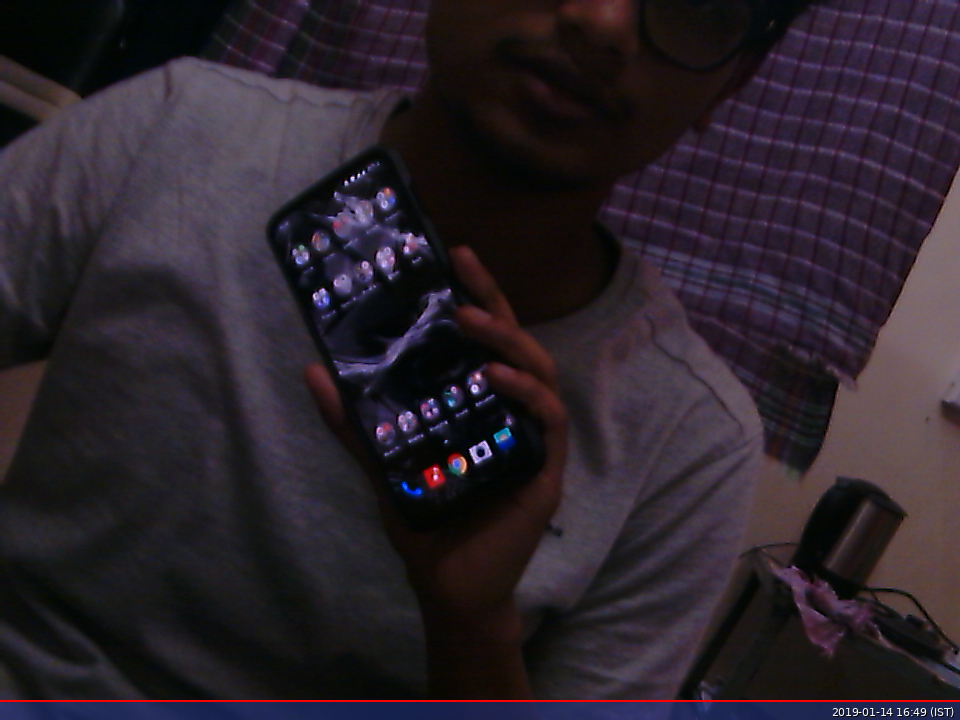

In [9]:
# Call the fswebcam command to capture the image from the USB webcam connected
call(["fswebcam", "-p", "YUYV", "-d", "/dev/video0", "-r", "1024×960",img_name ])
image = cv2.imread(img_name)
# See the image (for presentation purpose only)

Image(img_name)

In [10]:
# Going for the forward pass throught the network
model.setInput(cv2.dnn.blobFromImage(image, size=(300, 300), swapRB=True))
output = model.forward()

In [11]:
objs = []

In [12]:
for detection in output[0, 0, :, :]:
    confidence = detection[2]
    if confidence > .5:
        class_id = detection[1]
        class_name=id_class_name(class_id,classNames)
        objs.append(class_name)

In [13]:
l = len(objs)
if l == 0 :
        out = "Sorry, I can't see clearly"
else:
        out = "The scene contains " 
        for n,i in enumerate(objs):
                if n == 0:
                        out = out + " " + i
                else:
                        out = out + " and " + i

In [14]:
# The final sentence in the variable out
print(out)

The scene contains  person and cell phone


In [15]:
# Write the the string to a text file
with open("out.txt","w") as f:
    f.write(out)
    

In [16]:
# Convert the text file to a wav file so that the blind can listen to the audio
call(["text2wave", "out.txt", "-o", "out.wav"])

0

In [17]:
# Listen to the audio, for demonstration purpose only

from IPython.display import Audio as IPAudio
IPAudio("out.wav")

In [ ]:
## Use the pynq overlay to route the audio through the 3.5 mm headphone jack on the board

# from pynq.overlays.base import BaseOverlay
# base = BaseOverlay("base.bit")
# pAudio = base.audio

# pAudio.load("/home/xilinx/jupyter_notebooks/base/audio/waroftheworlds.wav")
# pAudio.play()